LINEAR REGRESSION MACHINE LEARNING MODEL

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('USA_Housing.csv')

In [4]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [5]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [6]:
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


Handling Null Values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
print(df.isnull().sum())

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


Strategies:
1. Removing rows with null values: If there is a certain row with missing data, then you can delete the entire row with all the features in that row
        updated_df = newdf.dropna(axis=0)
2. Removing columns with null values: this is an extreme case and should only be used when there are many null values in the column.
    updated_df = df.dropna(axis=1)
    updated_df = df.drop(column_name, axis=1)
3. Imputation:


        1. Filling the missing data with the mean or median value if it’s a numerical variable.
        2. Filling the missing data with mode if it’s a categorical value.
        3. Filling the numerical value with 0 or -999, or some other number that will not occur in the data. This can be done so that the machine can recognize that the data is not real or is different.
        4. Filling the categorical value with a new type for the missing values.
                updated_df[column_name]=updated_df[column_name].fillna(df[column_name].mean())
        5. Filling with a Regression Model


In [33]:
titanic=pd.read_csv('titanic_train.csv')

In [34]:
updated_df = titanic.drop('Cabin', axis=1)
updated_df['Ageismissing'] = updated_df['Age'].isnull()

In [35]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy = 'median')
updated_df['Age'] = my_imputer.fit_transform(updated_df[['Age']])
#updated_df.info()
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Embarked      889 non-null    object 
 11  Ageismissing  891 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(4)
memory usage: 77.6+ KB


Handling Categorical Variables

The techniques that you'll cover are the following:


1. Replacing values:
    replace_map = {variable_name: {category_1: 1, category_2: 2, category_3: 3}}

    labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
    replace_map_comp = {'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

    cat_df_flights_replace.replace(replace_map_comp, inplace=True)

    print(cat_df_flights_replace.head())

    print(replace_map_comp)

2. Encoding labels
    Another approach is to encode categorical values with a technique called "label encoding", which allows you to convert each value in a column to a number. Numerical labels are always between 0 and n_categories-1.

    from sklearn.preprocessing import LabelEncoder

    lb_make = LabelEncoder()
    cat_df_flights_sklearn['carrier_code'] = lb_make.fit_transform(cat_df_flights['carrier'])

    cat_df_flights_sklearn.head() #Results in appending a new column to df

    Label encoding is pretty much intuitive and straight-forward and may give you a good performance from your learning algorithm, but it has as disadvantage that the numerical values can be misinterpreted by the algorithm.

3. One-Hot encoding
    The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly.

    pandas' .get_dummies(): creates dummy/indicator variables (1 or 0) 
    There are mainly three arguments important here, the first one is the DataFrame you want to encode on, second being the columns argument which lets you specify the columns you want to do encoding on, and third, the prefix argument which lets you specify the prefix for the new columns that will be created after encoding.


    cat_df_flights_onehot = pd.get_dummies(cat_df_flights_onehot, columns=['carrier'], prefix = ['carrier'])

    print(cat_df_flights_onehot.head())

    While one-hot encoding solves the problem of unequal weights given to categories within a feature, it is not very useful when there are many categories, as that will result in formation of as many new columns, which can result in the curse of dimensionality. The concept of the “curse of dimensionality” discusses that in high-dimensional spaces some things just stop working properly.

4. Binary encoding
    This technique is not as intuitive as the previous ones. In this technique, first the categories are encoded as ordinal, then those integers are converted into binary code, then the digits from that binary string are split into separate columns. This encodes the data in fewer dimensions than one-hot.

    pip install category_encoders

    import category_encoders as ce

    encoder = ce.BinaryEncoder(cols=['carrier'])
    df_binary = encoder.fit_transform(cat_df_flights_ce)

    df_binary.head()

5. Backward difference encoding

    This technique falls under the contrast coding system for categorical features. A feature of K categories, or levels, usually enters a regression as a sequence of K-1 dummy variables. In backward difference coding, the mean of the dependent variable for a level is compared with the mean of the dependent variable for the prior level. This type of coding may be useful for a nominal or an ordinal variable.

    encoder = ce.BackwardDifferenceEncoder(cols=['carrier'])
    df_bd = encoder.fit_transform(cat_df_flights_ce)

    df_bd.head()

    The interesting thing here is that you can see that the results are not the standard 1’s and 0’s you saw in the dummy encoding examples but rather regressed continuous values.
    
6. Miscellaneous features
    Sometimes you may encounter categorical feature columns which specify the ranges of values for observation points, for example, the age column might be described in the form of categories like 0-20, 20-40 and so on.

    While there can be a lot of ways to deal with such features, the most common ones are either split these ranges into two separate columns or replace them with some measure like the mean of that range.

    dummy_df_age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})
    dummy_df_age['start'], dummy_df_age['end'] = zip(*dummy_df_age['age'].map(lambda x: x.split('-')))

    dummy_df_age.head()

    To replace the range with its mean, you will write a split_mean() function which basically takes one range at a time, splits it, then calculates the mean and returns it. To apply a certain function to all the entities of a column you will use the .apply() method:

    def split_mean(x):
        split_list = x.split('-')
        mean = (float(split_list[0])+float(split_list[1]))/2
        return mean

    dummy_df_age['age_mean'] = dummy_df_age['age'].apply(lambda x: split_mean(x))

    dummy_df_age.head()


In [36]:
titanic = pd.get_dummies(titanic, columns=['Sex'], prefix = ['Sex_'])
titanic


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex__female,Sex__male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,0,1


In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
titanic.head()
titanic.drop("Ticket",axis=1,inplace=True)
titanic.drop("Cabin",axis=1,inplace=True)

In [38]:
titanic.drop("Name",axis=1,inplace=True)

In [39]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
titanic['Embarked'] = lb_make.fit_transform(titanic['Embarked'])
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex__female,Sex__male
0,1,0,3,22.0,1,0,7.2500,2,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0
2,3,1,3,26.0,0,0,7.9250,2,1,0
3,4,1,1,35.0,1,0,53.1000,2,1,0
4,5,0,3,35.0,0,0,8.0500,2,0,1


In [40]:
testdf = titanic[titanic['Age'].isnull()==True]
traindf = titanic[titanic['Age'].isnull()==False]
y = traindf['Age']
traindf.drop("Age",axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop("Age",axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['Age']= pred

C:\Users\arora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\arora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\arora\AppData\Local\Temp/ipykernel_94488/853513234.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

Univariate Analysis

Links
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html


<AxesSubplot:ylabel='Density'>

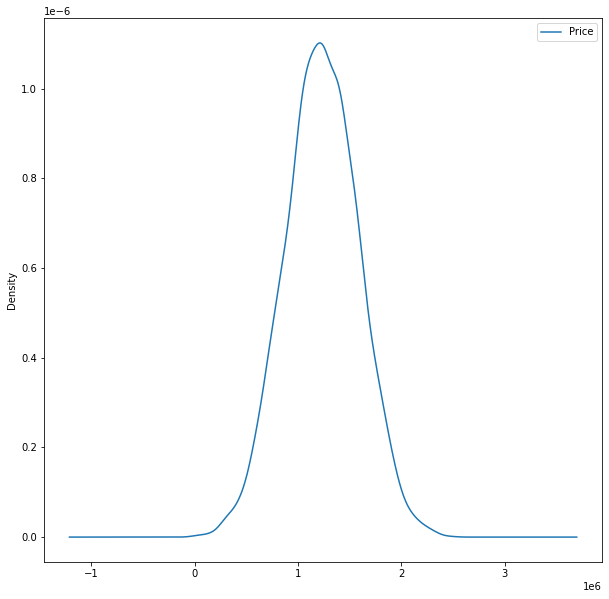

In [41]:
df[['Price']].plot.density(figsize=(10,10))

<AxesSubplot:>

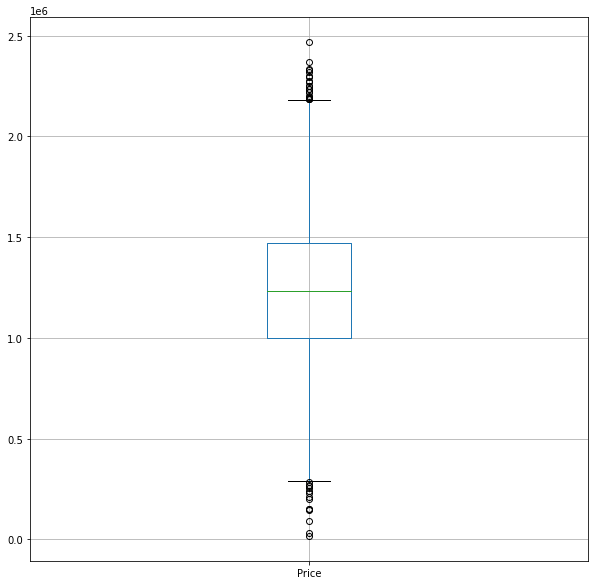

In [42]:
df[['Price']].boxplot(figsize=(10,10))

<AxesSubplot:ylabel='Frequency'>

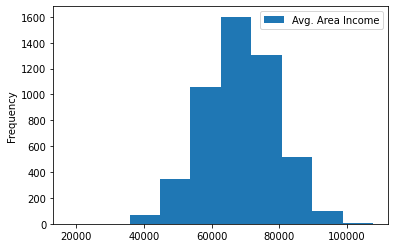

In [43]:
df[['Avg. Area Income']].plot.hist()

<AxesSubplot:>

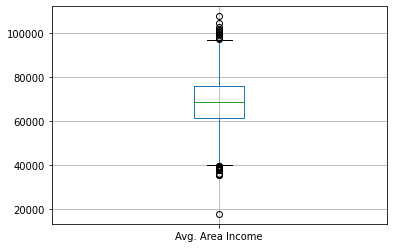

In [44]:
df[['Avg. Area Income']].boxplot()

<AxesSubplot:ylabel='Frequency'>

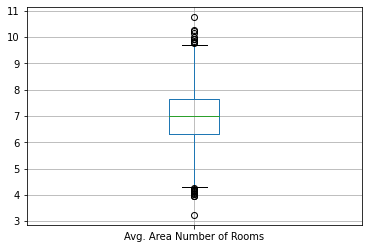

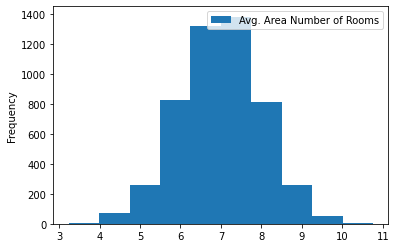

In [45]:
df[['Avg. Area Number of Rooms']].boxplot()
df[['Avg. Area Number of Rooms']].plot.hist()

<AxesSubplot:ylabel='Frequency'>

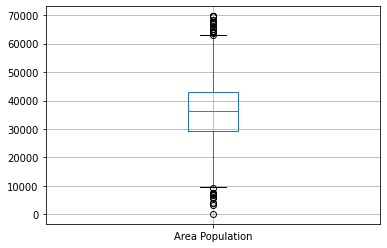

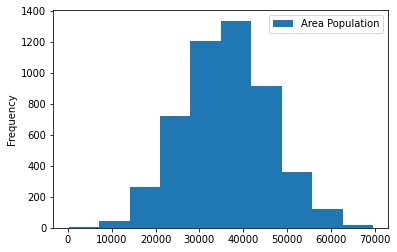

In [46]:
df[['Area Population']].boxplot()
df[['Area Population']].plot.hist()

<AxesSubplot:ylabel='Frequency'>

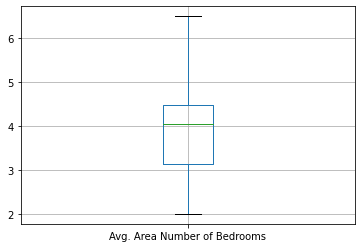

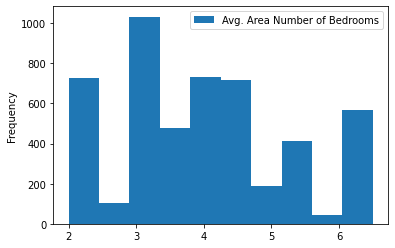

In [47]:
df[['Avg. Area Number of Bedrooms']].boxplot()
df[['Avg. Area Number of Bedrooms']].plot.hist()

<AxesSubplot:ylabel='Frequency'>

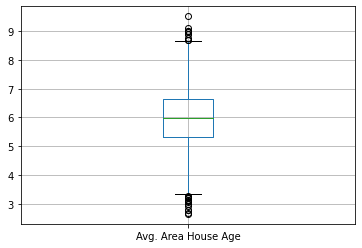

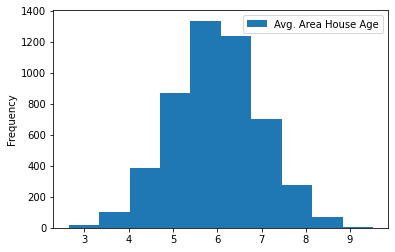

In [48]:
df[['Avg. Area House Age']].boxplot()
df[['Avg. Area House Age']].plot.hist()


Bivariate Analysis

https://editor.analyticsvidhya.com/uploads/78011Picture3.png

Type of variable
1. Categorical vs categorical: 

<AxesSubplot:xlabel='Avg. Area Income', ylabel='Price'>

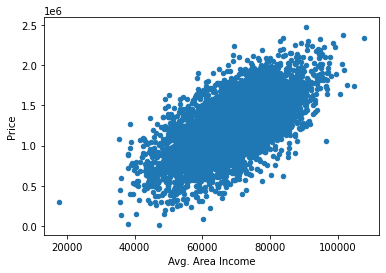

In [49]:
df.plot.scatter(x='Avg. Area Income',y='Price')

<AxesSubplot:xlabel='Avg. Area Number of Rooms', ylabel='Price'>

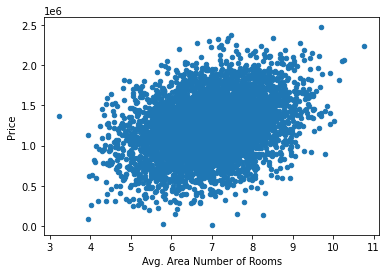

In [50]:
df.plot.scatter(x='Avg. Area Number of Rooms',y='Price')

In [51]:
df['Avg. Area Number of Bedrooms'].apply(lambda x: round(x)).value_counts()
df['Avg. Area Number of Bedrooms']=df['Avg. Area Number of Bedrooms'].apply(lambda x: round(x))


Text(0.5, 1.0, 'Price by Avg area number of bedrooms')

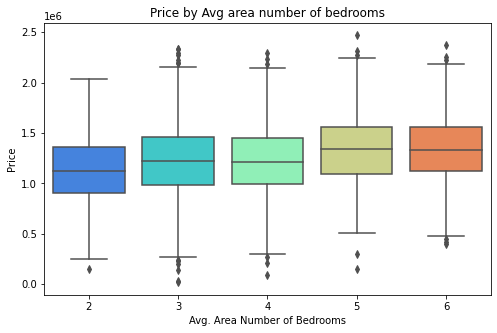

In [52]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Avg. Area Number of Bedrooms',y='Price',data=df, palette='rainbow')
plt.title("Price by Avg area number of bedrooms")

<AxesSubplot:xlabel='Area Population', ylabel='Price'>

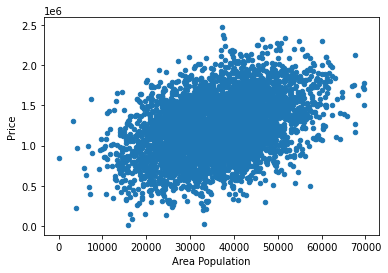

In [53]:
df.plot.scatter(x='Area Population',y='Price')

<AxesSubplot:xlabel='Avg. Area House Age', ylabel='Price'>

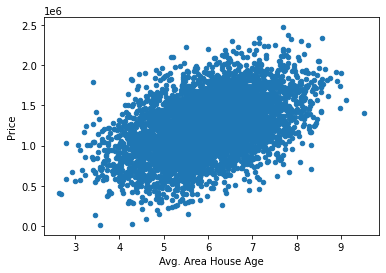

In [54]:
df[['Avg. Area House Age','Price']].plot.scatter(x='Avg. Area House Age',y='Price')

<AxesSubplot:>

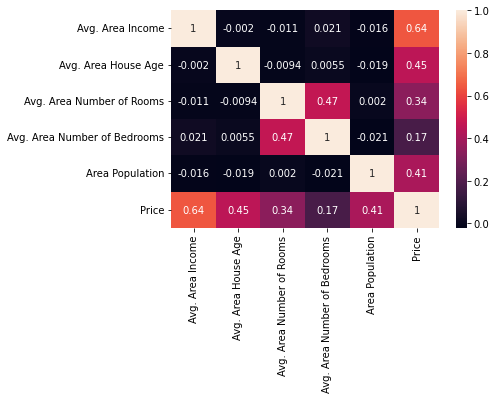

In [55]:
sns.heatmap(df.corr(),annot = True
           )

#this corr map is used to find the correlation between the attributes and the pricing so as to 
#get an idea about the relationship between them.

In [56]:
df.columns 


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [57]:
x = df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms','Area Population']]
#separate the other attributes from the predicting attribute

In [58]:
y = df[['Price']]
#separte the predicting attribute into Y for model training 

In [59]:
from sklearn.model_selection import train_test_split

#import model selection train test split for splitting the data into test and train for 
#model validation.

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)


In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lm = LinearRegression()
#loading the model constructor

In [63]:
lm.fit(x_train,y_train)
#training or fitting the train data into the model

LinearRegression()

In [64]:
print(lm.intercept_)

[-2639597.44931282]


In [65]:
lm.coef_
#examining the co-efficients of the fitted model.

array([[2.15284483e+01, 1.64883390e+05, 1.22363434e+05, 2.23655740e+03,
        1.51500180e+01]])

In [66]:
x_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [67]:
cdf = pd.DataFrame(data=lm.coef_.reshape(5,1),index=x_train.columns,columns=['Coeff'])

In [68]:
cdf

,Coeff
Avg. Area Income,21.528448
Avg. Area House Age,164883.389518
Avg. Area Number of Rooms,122363.433880
Avg. Area Number of Bedrooms,2236.557404
Area Population,15.150018


In [69]:
predictions = lm.predict(x_test)

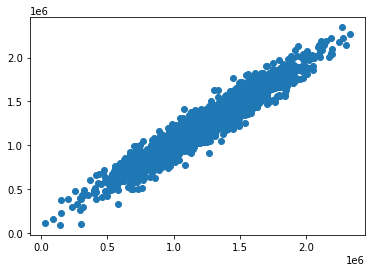

In [70]:
plt.scatter(y_test,predictions)
#to visualise the predictions and the test Y !! almost it is forming a linear line with less deviation

C:\Users\arora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

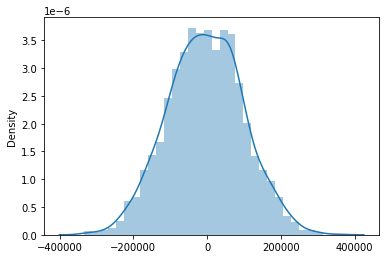

In [71]:
sns.distplot((y_test-predictions))

In [72]:
from sklearn import metrics

# R2
Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model. 
It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s)
R2= 1- SSres / SStot
SSres is the sum of squares of the residual errors.
SStot is the total sum of the errors.
It can be referred that 68% of the changeability of the dependent output attribute can be explained by the model while the remaining 32 % of the variability is still unaccounted for.
R2 indicates the proportion of data points which lie within the line created by the regression equation. A higher value of R2 is desirable as it indicates better results.


In [118]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 score:', metrics.r2_score(y_test, predictions))

MAE: 82292.4801728849
MSE: 10462712326.493023
RMSE: 102287.40062438298
R2 score: 0.9176686032560483


# Ridge Regression
Ridge regression uses L2 regularization to minimize the magnitude of the coefficients. It reduces the size of the coefficients and helps reduce model complexity.

Higher values of ⍺ force coefficients to move towards zero and increases the restriction on the model. This decreases training performance, but also increases the generalizability of the model. Setting ⍺ too high could lead to a model that is too simple and underfits the data.

In [74]:
from sklearn.linear_model import Ridge
# Train model with default alpha=1
ridge = Ridge(alpha=1).fit(x_train, y_train)

LinearRegression()

In [77]:
predictions = ridge.predict(x_test)

In [78]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 score:', metrics.r2_score(y_test, predictions))

MAE: 82292.78665621692
MSE: 10462587720.32882
RMSE: 102286.79152426681
R2 score: 0.9176695837856874


In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.917562550800435
Best Params:  {'alpha': 1}


In [84]:
predictions = grid_result.predict(x_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 score:', metrics.r2_score(y_test, predictions))

MAE: 82292.78665621692
MSE: 10462587720.32882
RMSE: 102286.79152426681
R2 score: 0.9176695837856874


# Lasso Regression

In [85]:
from sklearn.linear_model import Lasso
# Train model with default alpha=1
lasso = Lasso(alpha=1).fit(x_train, y_train)

In [86]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.9175626941979587
Best Params:  {'alpha': 100}


In [87]:
predictions = grid_result.predict(x_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 score:', metrics.r2_score(y_test, predictions))

MAE: 82289.62495958555
MSE: 10461931812.807789
RMSE: 102283.58525593336
R2 score: 0.9176747451416204
